# Random sampling and probability

In [1]:
# Import auxiliary libraries for demonstration

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams[ "figure.figsize" ] = [ 5, 4 ]

plt.rcParams[ "figure.dpi" ] = 80
plt.rcParams[ "font.family" ] = "Times New Roman"
plt.rcParams[ "font.size" ] = '14'

## Metropolis–Hastings algorithm

### Metropolis–Hastings sampler

#### Class initialization help

In [2]:
from ffpack.rsp import MetropolisHastingsSampler
help( MetropolisHastingsSampler.__init__ )

Help on function __init__ in module ffpack.rsp.metropolisHastingsAlgo:

__init__(self, initialVal=None, targetPdf=None, proposalCSampler=None)
    Initialize self.  See help(type(self)) for accurate signature.



#### Example with exponential distribution

In [3]:
# Set random seed for repeatable results
from ffpack.config import globalConfig
globalConfig.setSeed( 0 )

mhsInitialVal = 1.0

def mhsTargetPdf( x ):
    return 0 if x < 0 else np.exp( -x )

def mhsProposalCSampler( x ):
    return np.random.normal( x, 1 )

In [4]:
mhSampler = MetropolisHastingsSampler( initialVal=mhsInitialVal, 
                                       targetPdf=mhsTargetPdf, 
                                       proposalCSampler=mhsProposalCSampler )

In [5]:
mhsResults = np.zeros( 10000 )
for i in range( 10000 ):
    mhsResults[ i ] = mhSampler.sample()

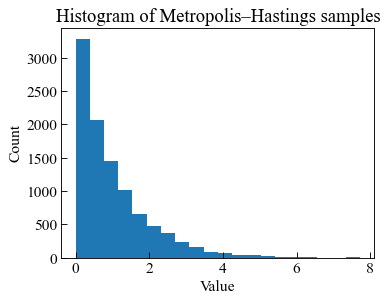

In [6]:
fig, ax = plt.subplots()

ax.hist( np.array( mhsResults ), bins=20 )

ax.tick_params(axis='x', direction="in", length=5)
ax.tick_params(axis='y', direction="in", length=5)
ax.set_ylabel( "Count" )
ax.set_xlabel( "Value" )
ax.set_title( "Histogram of Metropolis–Hastings samples" )

plt.tight_layout()
plt.show()